In [1]:
import os
os.chdir("..")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context(context='notebook', font_scale=1.4)
sns.set_style(style='white', rc={'font.family': 'Monospace'})

%pylab inline

In [3]:
from src.scrub.clean_data import get_iris

In [9]:
df = get_iris()
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.describe(include=['O'])

,iris_type
count,150
unique,3
top,setosa
freq,50


## Check Class Imbalance

''

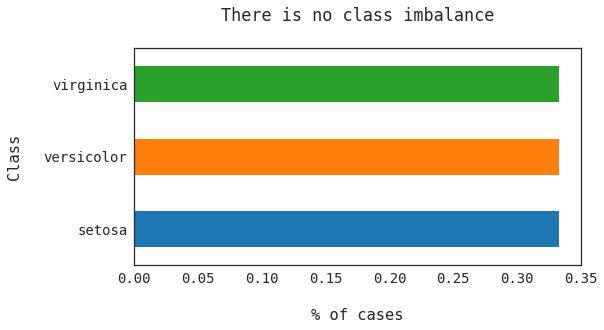

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
df['iris_type'].value_counts(normalize=True).plot.barh(ax=ax)

ax.set_title("There is no class imbalance\n")
ax.set_xlabel("\n% of cases")
ax.set_ylabel("Class\n")

plt.savefig("figures/01-class-distribution.png", bbox_inches='tight')
;

## Variation across groups

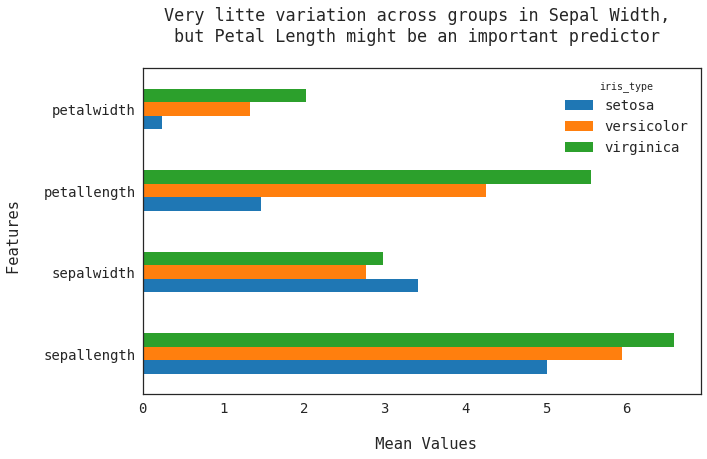

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby('iris_type').mean().T.plot.barh(ax=ax)

ax.set_title("""Very litte variation across groups in Sepal Width, \nbut Petal Length might be an important predictor \n""")
ax.set_xlabel("\n Mean Values")
ax.set_ylabel("Features \n")

plt.savefig("figures/02-across-groups-variation.png", bbox_inches='tight');

## ANOVA

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
skb = SelectKBest(k='all', score_func=f_classif)

X = df.copy().drop(['iris_type'], axis=1).values
y = df.copy().loc[:, 'iris_type'].replace({'setosa': 0, 'versicolor': 1, 'virginica': 2}).values

skb.fit(X, y)

anova_results = \
pd.DataFrame({
    'F-score': skb.scores_,
    'P-value': skb.pvalues_}, index=df.columns[:4])

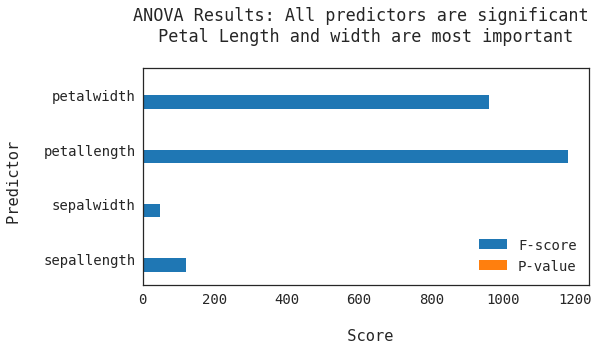

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))
anova_results.plot.barh(ax=ax)

ax.set_title("ANOVA Results: All predictors are significant \n Petal Length and width are most important \n")
ax.set_xlabel("\n Score")
ax.set_ylabel("Predictor \n")

plt.savefig("figures/03-ANOVA-results.png", bbox_inches='tight');

## Principal Components Analysis

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [20]:
pca.fit(X, y)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

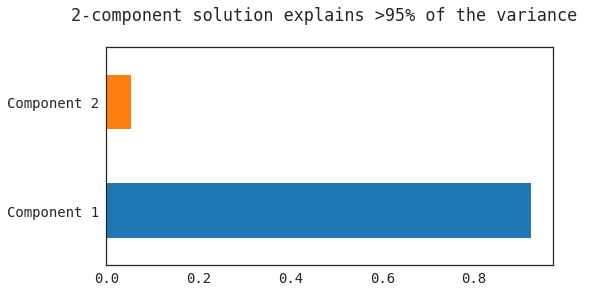

In [21]:
(pd.Series(pca.explained_variance_ratio_, 
           index=['Component 1', 'Component 2'])
 .plot.barh(title="2-component solution explains >95% of the variance \n", figsize=(8, 4))
)

plt.savefig("figures/04-PCA-results.png", bbox_inches='tight');

In [22]:
X_2dimensions = pd.DataFrame(pca.transform(X), columns=['C1', 'C2'])

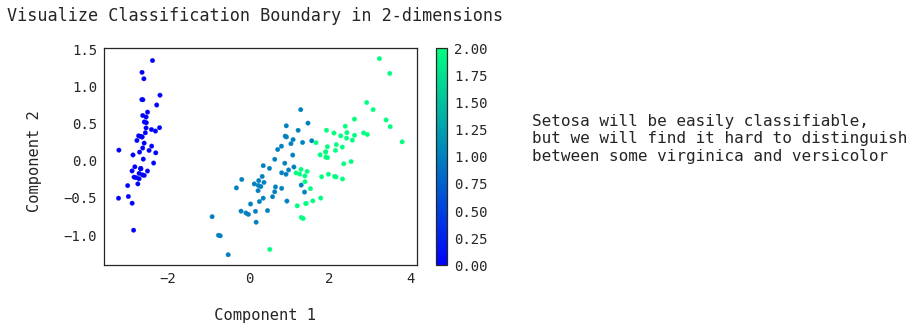

In [25]:
fig, ax = plt.subplots(figsize=(7, 4))
X_2dimensions.plot.scatter(x='C1', y='C2', c=y,  cmap='winter', ax=ax)

ax.set_title("Visualize Classification Boundary in 2-dimensions \n")
ax.set_xlabel("\n Component 1")
ax.set_ylabel("Component 2 \n")
ax.text(7, 0, """
Setosa will be easily classifiable, 
but we will find it hard to distinguish 
between some virginica and versicolor""", fontsize=16)

plt.savefig("figures/05-classification-boundary.png", bbox_inches='tight');